In [1]:
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
import os

from astropy.io import fits
from astropy import table as t
from astropy import wcs
import numpy as np
import pyfits
import pydl

import matplotlib.pyplot as plt
from matplotlib import rc

from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from scipy import interpolate


from astropy.cosmology import WMAP7

import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from matplotlib.colors import LogNorm

rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] =15
rcParams['axes.labelsize'] = 15
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 15

/Users/nitya/miniconda3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
a = pd.read_csv('MyTable_0_nityamd.csv', delimiter = ',')
a.head()

,specObjID,plateid,mjd,targettype,z,ra,dec,spectrotype,lick_hd_a,lick_hd_a_err,lick_hd_a_model,lick_hd_a_sub,lick_hd_a_sub_err,d4000_n,d4000_n_err,d4000_n_model,d4000_n_sub,d4000_n_sub_err,lgm_tot_p50,sfr_tot_p50
0,577589709237151744,513,51989,GALAXY,0.133179,174.8802,1.337455,GALAXY,0.578695,2.621818,2.903744,0.578695,2.621818,1.486715,0.070735,1.484149,1.486715,0.070735,10.514130,0.428997
1,577600979231336448,513,51989,GALAXY,0.076272,174.8448,1.522124,GALAXY,-1.599530,0.711329,-1.793707,-1.599530,0.711329,1.952357,0.027204,1.855160,1.952357,0.027204,10.692400,-1.739615
2,577613623615055872,513,51989,QSO,0.000070,174.4868,1.543553,STAR,-1.913898,0.392502,-0.819409,-1.913898,0.392502,1.650742,0.012315,1.649250,1.679070,0.012684,-9999.000000,-9999.000000
3,577627917266216960,513,51989,GALAXY,0.050428,173.8995,1.737907,GALAXY,-1.703762,1.040746,-1.042168,-1.703762,1.040746,1.716901,0.037443,1.774271,1.716901,0.037443,10.367050,-1.641533
4,577632315312728064,513,51989,GALAXY,0.065045,173.6642,1.723826,GALAXY,3.565736,0.615967,5.506765,5.314827,0.601876,1.183934,0.012487,1.174847,1.182265,0.012476,9.662599,0.265054


In [3]:
print(len(a), len(a[a['targettype']== 'GALAXY']))

1477411 901877


In [4]:
d = a[a['targettype']== 'GALAXY']
print(len(d['lgm_tot_p50'][d['lgm_tot_p50']==-9999]))
d = d[d['lgm_tot_p50']>=8.5]

98512


/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


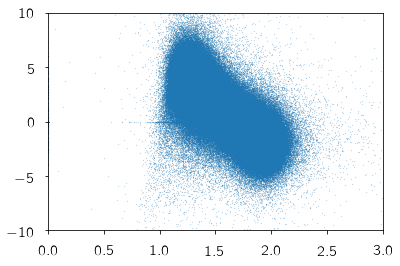

In [5]:
plt.scatter(d['d4000_n'], d['lick_hd_a'], s = 0.01)
plt.xlim(0,3.0)
plt.ylim(-10,10)
plt.show()

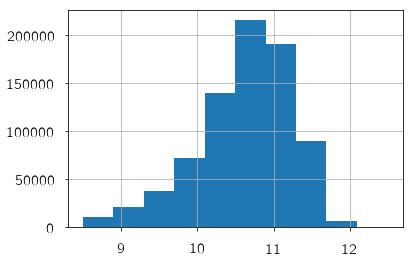

In [6]:
d['lgm_tot_p50'].hist()

In [7]:
print(min(d['d4000_n']), min(d['lick_hd_a']),max(d['d4000_n']),max(d['lick_hd_a']))
d = d[(d['d4000_n']>0) & (d['d4000_n']<3)][(d['lick_hd_a']>-10) &(d['lick_hd_a']<15)]
print(len(d))

-1203.903 -7304.026999999999 330.8165 2216.673


/Users/nitya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


784435


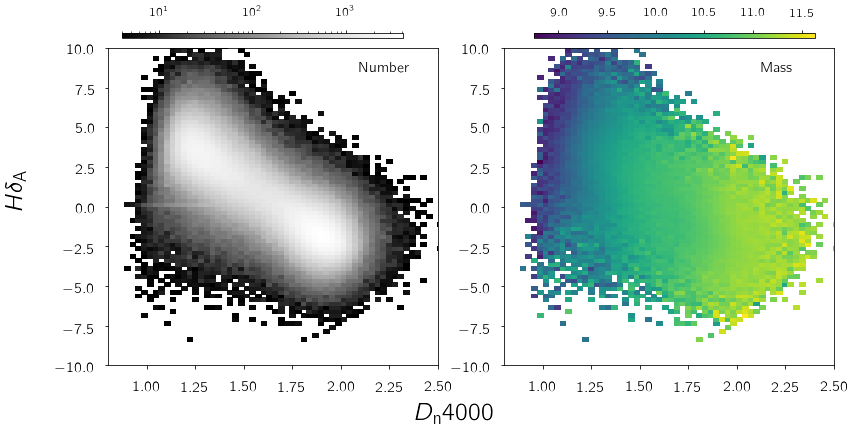

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,7))
t1 = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['lgm_tot_p50'],statistic = 'mean',bins=(100,100))
tcount = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['lgm_tot_p50'],statistic = 'count',bins=(100,100))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(tcount[0], mask = tcount[0] <= 3)
mass = np.ma.array(t1[0], mask = tcount[0] <= 3)

cs1 = ax1.pcolormesh(yedges1,xedges1,np.transpose(number), cmap = plt.cm.Greys_r, norm = LogNorm())
ax1.set_xlim(0.8,2.5)
ax1.set_ylim(-10,10)
cs2 = ax2.pcolormesh(yedges1,xedges1,(np.transpose(mass)))
ax2.set_xlim(0.8,2.5)
ax2.set_ylim(-10,10)

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.84, 0.79, r'Mass',
         ha='center', va='center', fontsize = 15)
fig.text(0.42, 0.79, 'Number',
         ha='center', va='center', fontsize = 15)
fig.text(0.495, 0.1, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.03, 0.55, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

plt.gcf().subplots_adjust(wspace=0.2, hspace = 0, top = 0.83, bottom = 0.2)
plt.savefig('/Users/Nitya/Desktop/hd_d4000_masses.pdf')
plt.show()

In [16]:
b = pd.read_csv('phototable_nityamd.csv', delimiter = ',')
print(len(b), len(b[b['targettype']=='GALAXY']))
b.head()

1290136 843575


,specObjID,plateid,mjd,targettype,z,ra,dec,spectrotype,psfFlux_z,fiberFlux_z,modelMag_z,fiberMag_z,petroMag_z,psfMag_z,cModelMag_z
0,2221489359343872000,1973,53432,GALAXY,0.106930,156.7245,37.81742,GALAXY,41.30691,44.27812,17.14370,18.38422,17.21950,18.45959,17.16346
1,2221491283489220608,1973,53432,QA,0.105522,157.0155,37.94542,GALAXY,115.93210,116.46590,15.50232,17.33446,15.55499,17.33945,15.29645
2,2221490733733406720,1973,53432,QA,0.167102,157.1610,38.05308,GALAXY,77.03185,74.64256,16.45179,17.81743,16.75446,17.78322,16.66410
3,2221500629338056704,1973,53432,GALAXY,0.164161,157.3284,38.15210,GALAXY,76.41125,75.88276,16.95885,17.79954,17.09626,17.79201,17.11255
4,2249639880688691200,1998,53433,QA,0.143637,159.0103,38.42761,GALAXY,59.67904,59.26440,16.49447,18.06785,16.78261,18.06028,16.63495


In [38]:
df = pd.merge(a, b, on=['specObjID'])
print(len(a), len(b), len(df))
df.head()

1477411 1290136 1290136


,specObjID,plateid_x,mjd_x,targettype_x,z_x,ra_x,dec_x,spectrotype_x,lick_hd_a,lick_hd_a_err,...,ra_y,dec_y,spectrotype_y,psfFlux_z,fiberFlux_z,modelMag_z,fiberMag_z,petroMag_z,psfMag_z,cModelMag_z
0,577589709237151744,513,51989,GALAXY,0.133179,174.8802,1.337455,GALAXY,0.578695,2.621818,...,174.8802,1.337455,GALAXY,16.58161,21.27037,17.04241,19.17925,17.13538,19.44878,17.01567
1,577600979231336448,513,51989,GALAXY,0.076272,174.8448,1.522124,GALAXY,-1.599530,0.711329,...,174.8448,1.522124,GALAXY,164.85580,155.43230,15.91677,17.02112,16.02447,16.95722,15.95866
2,577613623615055872,513,51989,QSO,0.000070,174.4868,1.543553,STAR,-1.913898,0.392502,...,174.4868,1.543553,STAR,306.91540,226.59930,16.27307,16.61184,16.33516,16.28245,16.28226
3,577627917266216960,513,51989,GALAXY,0.050428,173.8995,1.737907,GALAXY,-1.703762,1.040746,...,173.8995,1.737907,GALAXY,88.87761,92.10589,15.63758,17.58921,15.70567,17.62794,15.74431
4,577632315312728064,513,51989,GALAXY,0.065045,173.6642,1.723826,GALAXY,3.565736,0.615967,...,173.6642,1.723826,GALAXY,38.75483,49.84200,16.72657,18.25577,16.83160,18.52879,16.71808


In [ ]:
#lum = 4*3.14159*(ldist**2.0)*(3.087**2.0)*(10**25.0)*flux_in_jansky

In [64]:
kc = pyfits.open('kcorrect.none.model.z0.00.fits')
kc = kc[1].data
print(len(kc))
kc.columns

2506754


ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ABMAGGIES'; format = '8E'
    name = 'ABMAGGIES_IVAR'; format = '8E'
    name = 'Z'; format = 'E'
    name = 'ABSMAG'; format = '8E'
    name = 'ABSMAG_IVAR'; format = '8E'
    name = 'KCORRECT'; format = '8E'
    name = 'MTOL'; format = '8E'
    name = 'MASS'; format = 'E'
    name = 'INTSFH'; format = 'E'
    name = 'METS'; format = 'E'
    name = 'B300'; format = 'E'
    name = 'B1000'; format = 'E'
    name = 'COEFFS'; format = '5E'
)

In [54]:
from pydl.pydlutils import spheregroup

Matchlength of 3"

In [66]:
matches = spheregroup.spherematch(df['ra_x'],df['dec_x'],
                                  kc['RA'],kc['DEC'],
                                  matchlength = 0.000833333)
df_ind,kc_ind,dist = matches
df_ind = np.array([np.int(x) for x in df_ind])
kc_ind = np.array([np.int(x) for x in kc_ind])
print(len(df),len(df_ind))

In [128]:
newdf = df.iloc[df_ind]
absmags = kc['ABSMAG'][kc_ind]
#sun's absmag in z band: 4.6
solar_z_band_mag = 4.6
z_band_lum = [(4.6 - x)/2.5 for x in absmags[:,4]]
newdf['zband_lum'] = z_band_lum

/Users/nitya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
newdf.head()

,specObjID,plateid_x,mjd_x,targettype_x,z_x,ra_x,dec_x,spectrotype_x,lick_hd_a,lick_hd_a_err,...,dec_y,spectrotype_y,psfFlux_z,fiberFlux_z,modelMag_z,fiberMag_z,petroMag_z,psfMag_z,cModelMag_z,zband_lum
1288098,571978357969807360,508,52366,GALAXY,0.065824,166.478300,2.094602,GALAXY,2.151605,2.371614,...,2.094602,GALAXY,28.06302,33.45266,16.86503,18.68839,16.92087,18.87891,16.92317,9.759862
400208,1562851102729201664,1388,53119,GALAXY,0.111108,232.158100,32.259860,GALAXY,2.135609,1.160977,...,32.259860,GALAXY,68.12619,89.96645,15.89000,17.61473,15.95821,17.91659,15.79503,10.615238
893090,1222891443304032256,1086,52525,QSO,-0.000018,9.536514,0.731605,STAR,-5.912721,0.552870,...,0.731605,STAR,516.96740,378.92180,15.70670,16.05362,15.75440,15.71634,15.70687,3.146642
590268,2187701916006377472,1943,53386,GALAXY,0.061661,142.969900,32.348130,GALAXY,3.941239,0.945998,...,32.348130,GALAXY,42.61896,50.59392,17.25803,18.23952,17.33761,18.42566,17.28630,9.512923
989578,487552899115673600,433,51873,GALAXY,0.106914,116.239100,37.233990,GALAXY,2.766207,0.786529,...,37.233990,GALAXY,26.55329,39.21035,16.65694,18.51611,16.68685,18.93886,16.56544,10.268623


In [130]:
newdf.columns

Index(['specObjID', 'plateid_x', 'mjd_x', 'targettype_x', 'z_x', 'ra_x',
       'dec_x', 'spectrotype_x', 'lick_hd_a', 'lick_hd_a_err',
       'lick_hd_a_model', 'lick_hd_a_sub', 'lick_hd_a_sub_err', 'd4000_n',
       'd4000_n_err', 'd4000_n_model', 'd4000_n_sub', 'd4000_n_sub_err',
       'lgm_tot_p50', 'sfr_tot_p50', 'plateid_y', 'mjd_y', 'targettype_y',
       'z_y', 'ra_y', 'dec_y', 'spectrotype_y', 'psfFlux_z', 'fiberFlux_z',
       'modelMag_z', 'fiberMag_z', 'petroMag_z', 'psfMag_z', 'cModelMag_z',
       'zband_lum'],
      dtype='object')

In [136]:
print(len(newdf['zband_lum']),len(newdf['zband_lum'][newdf['zband_lum']<0]))
mlratio_z = [newdf['lgm_tot_p50'].iloc[i] - newdf['zband_lum'].iloc[i] for i in range(len(newdf))]
newdf['mlratio_z'] = mlratio_z
d = newdf[newdf['zband_lum']>0]

1213533 73679


In [144]:
d = d[d['targettype_x']== 'GALAXY']
print(len(d['lgm_tot_p50'][d['lgm_tot_p50']==-9999]))
d = d[d['lgm_tot_p50']>=8.5]
print(min(d['d4000_n']), min(d['lick_hd_a']),max(d['d4000_n']),max(d['lick_hd_a']))
d = d[(d['d4000_n']>0) & (d['d4000_n']<3)][(d['lick_hd_a']>-10) &(d['lick_hd_a']<15)]
print(len(d))

86174
-1203.903 -7304.026999999999 24.45944 2216.673


/Users/nitya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


735915


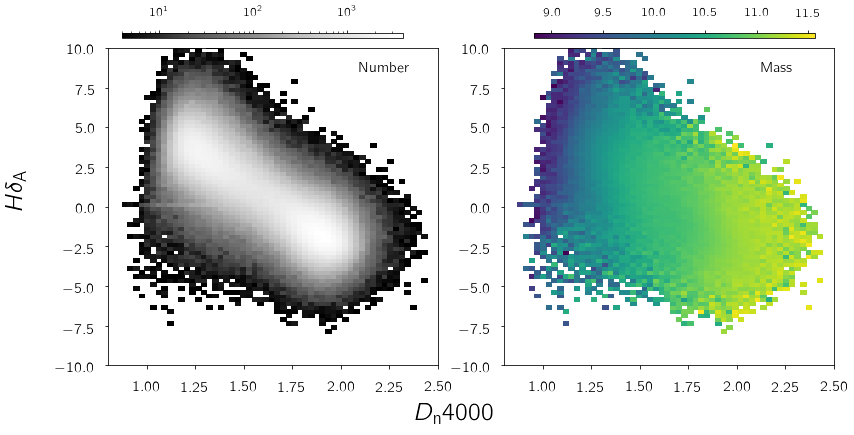

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,7))
t1 = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['lgm_tot_p50'],statistic = 'mean',bins=(100,100))
tcount = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['lgm_tot_p50'],statistic = 'count',bins=(100,100))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(tcount[0], mask = tcount[0] <= 3)
mass = np.ma.array(t1[0], mask = tcount[0] <= 3)

cs1 = ax1.pcolormesh(yedges1,xedges1,np.transpose(number), cmap = plt.cm.Greys_r, norm = LogNorm())
ax1.set_xlim(0.8,2.5)
ax1.set_ylim(-10,10)
cs2 = ax2.pcolormesh(yedges1,xedges1,(np.transpose(mass)))
ax2.set_xlim(0.8,2.5)
ax2.set_ylim(-10,10)

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.84, 0.79, r'Mass',
         ha='center', va='center', fontsize = 15)
fig.text(0.42, 0.79, 'Number',
         ha='center', va='center', fontsize = 15)
fig.text(0.495, 0.1, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.03, 0.55, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

plt.gcf().subplots_adjust(wspace=0.2, hspace = 0, top = 0.83, bottom = 0.2)
#plt.savefig('/Users/Nitya/Desktop/hd_d4000_mlratio.pdf')
plt.show()

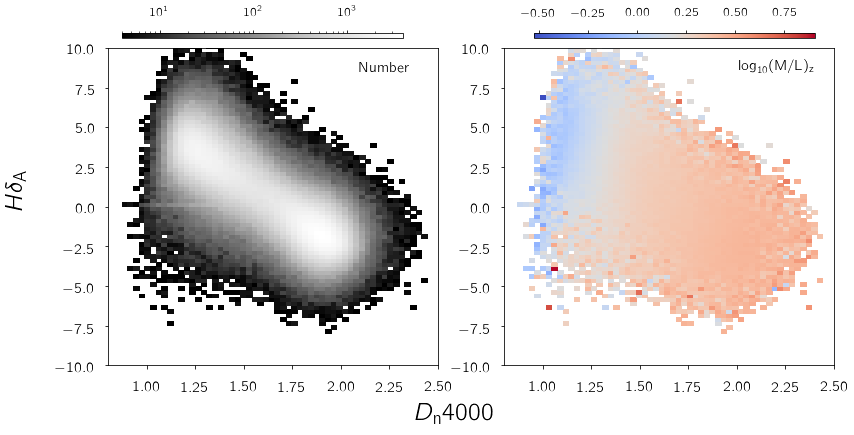

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,7))
t1 = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['mlratio_z'],statistic = 'mean',bins=(100,100))
tcount = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['mlratio_z'],statistic = 'count',bins=(100,100))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(tcount[0], mask = tcount[0] <= 3)
mass = np.ma.array(t1[0], mask = tcount[0] <= 3)

cs1 = ax1.pcolormesh(yedges1,xedges1,np.transpose(number), cmap = plt.cm.Greys_r, norm = LogNorm())
ax1.set_xlim(0.8,2.5)
ax1.set_ylim(-10,10)
cs2 = ax2.pcolormesh(yedges1,xedges1,(np.transpose(mass)), cmap = plt.cm.coolwarm)
ax2.set_xlim(0.8,2.5)
ax2.set_ylim(-10,10)

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.84, 0.79, r'${\rm log}_{10}(\rm M/L)_{z}$',
         ha='center', va='center', fontsize = 15)
fig.text(0.42, 0.79, 'Number',
         ha='center', va='center', fontsize = 15)
fig.text(0.495, 0.1, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.03, 0.55, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

plt.gcf().subplots_adjust(wspace=0.2, hspace = 0, top = 0.83, bottom = 0.2)
plt.savefig('/Users/Nitya/Desktop/hd_d4000_mlratio_fine_binning.pdf')
plt.show()

In [153]:
min(d['mlratio_z']), max(d['mlratio_z']), len(d)

(-3.205787213867188, 9.413400084648133, 735915)

In [154]:
np.mean(number)

318.23947939262473

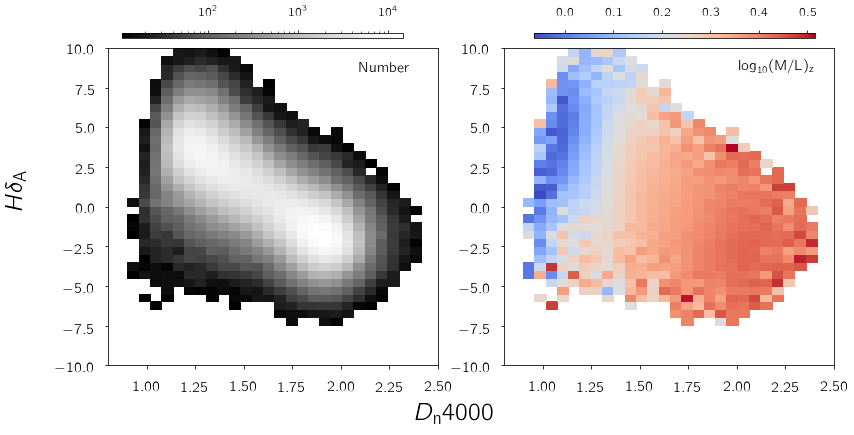

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,7))
t1 = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['mlratio_z'],statistic = 'mean',bins=(50,50))
tcount = binned_statistic_2d(d['d4000_n'], d['lick_hd_a'],d['mlratio_z'],statistic = 'count',bins=(50,50))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(tcount[0], mask = tcount[0] <= 10)
mass = np.ma.array(t1[0], mask = tcount[0] <= 10)

cs1 = ax1.pcolormesh(yedges1,xedges1,np.transpose(number), cmap = plt.cm.Greys_r, norm = LogNorm())
ax1.set_xlim(0.8,2.5)
ax1.set_ylim(-10,10)
cs2 = ax2.pcolormesh(yedges1,xedges1,(np.transpose(mass)), cmap = plt.cm.coolwarm)
ax2.set_xlim(0.8,2.5)
ax2.set_ylim(-10,10)

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.84, 0.79, r'${\rm log}_{10}(\rm M/L)_{z}$',
         ha='center', va='center', fontsize = 15)
fig.text(0.42, 0.79, 'Number',
         ha='center', va='center', fontsize = 15)
fig.text(0.495, 0.1, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.03, 0.55, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

plt.gcf().subplots_adjust(wspace=0.2, hspace = 0, top = 0.83, bottom = 0.2)
plt.savefig('/Users/Nitya/Desktop/hd_d4000_mlratio_coarser_binning.pdf')
plt.show()

In [160]:
d.to_csv('hd_d4000_mlratio_z.csv')